In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

In [28]:
# Load dataset
data = pd.read_csv('survey_lung_cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [30]:
# Check Data Null
null_perc=data.isnull().sum()/len(data)*100
null=data.isnull().sum()
overview=pd.concat((null,null_perc,data.nunique()),axis=1, keys=['Null counts','Null %','Cardinality'])
overview

,Null counts,Null %,Cardinality
GENDER,0,0.0,2
AGE,0,0.0,39
SMOKING,0,0.0,2
YELLOW_FINGERS,0,0.0,2
ANXIETY,0,0.0,2
PEER_PRESSURE,0,0.0,2
CHRONIC DISEASE,0,0.0,2
FATIGUE,0,0.0,2
ALLERGY,0,0.0,2
WHEEZING,0,0.0,2


In [31]:
# Label Encoder
data['GENDER'].replace(['M', 'F'], [0, 1], inplace=True)
data['LUNG_CANCER'].replace(['YES', 'NO'], [0, 1], inplace=True)
data.drop_duplicates(inplace=True)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [32]:
# Change value into 0,1
y = data['LUNG_CANCER']
X = data.drop('LUNG_CANCER',axis=1)

for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0


## SPLITTING DATA

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [34]:
from imblearn.over_sampling import RandomOverSampler
X_train,y_train=RandomOverSampler().fit_resample(X_train,y_train)

In [35]:
X.shape

(276, 15)

In [36]:
scaler = StandardScaler()
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])
X_val['AGE'] = scaler.transform(X_val[['AGE']])

X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,1.141439,0,1,0,0,0,1,0,1,1,1,1,0,0
1,0,-0.542503,0,1,1,0,0,1,0,1,1,1,1,1,1
2,1,1.141439,0,1,1,1,1,1,0,0,0,0,0,0,0
3,0,0.900876,1,0,0,0,0,1,0,1,1,1,1,0,1
4,0,-0.903347,0,1,0,0,0,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0,0.780594,0,0,0,1,0,1,0,1,0,1,1,0,1
288,0,0.058905,1,1,1,0,0,0,0,0,1,0,0,1,1
289,1,-0.422221,0,0,0,1,0,1,0,1,0,1,1,0,1
290,1,-0.542503,0,0,0,0,0,1,0,0,0,0,1,0,0


In [37]:
# import tensorflow as tf
# model = tf.keras.models.Sequential()
# # model.add(tf.keras.layers.LSTM(64, return_sequences=True))
# # model.add(tf.keras.layers.LSTM(units=64))

# # model.add(tf.keras.layers.Conv1D(64, activation='relu',kernel_size=3, input_shape=(32,1)))
# model.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=[15]))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=6, activation='relu'))
# # model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=4, activation='relu'))
# model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# # model.add(tf.keras.layers.Dense(units=6, activation='relu'))
# # model.add(tf.keras.layers.Dense(units=1))


In [38]:
# import tensorflow as tf
# model = tf.keras.models.Sequential()
# # model.add(tf.keras.layers.LSTM(64, return_sequences=True))
# # model.add(tf.keras.layers.LSTM(units=64))

# # model.add(tf.keras.layers.Conv1D(64, activation='relu',kernel_size=3, input_shape=(32,1)))
# model.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=[15]))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=4, activation='relu'))
# # model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [39]:
import tensorflow as tf
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.LSTM(64, return_sequences=True))
# model.add(tf.keras.layers.LSTM(units=64))

# model.add(tf.keras.layers.Conv1D(64, activation='relu',kernel_size=3, input_shape=[15]))
# model.add(tf.keras.layers.Embedding(10, 128, input_length=15))

model.add(tf.keras.layers.SimpleRNN(units=15, activation='tanh', input_shape=[15,1]))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [40]:
model.build()

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 15)                255       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 96        
                                                                 
 flatten_1 (Flatten)         (None, 6)                 0         
                                                                 
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 384
Trainable params: 384
Non-trainable 

In [42]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0009),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, 
                        epochs=100, batch_size=16,
                        validation_data=(X_val, y_val), 
                        shuffle=True)

Epoch 1/100
11/19 [================>.............] - ETA: 0s - loss: 0.6963 - accuracy: 0.5057 

19/19 [==============================] - 2s 27ms/step - loss: 0.6927 - accuracy: 0.5411 - val_loss: 0.6935 - val_accuracy: 0.7273
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6802 - accuracy: 0.5479 - val_loss: 0.6882 - val_accuracy: 0.7091
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6782 - accuracy: 0.5205 - val_loss: 0.6882 - val_accuracy: 0.6545
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6781 - accuracy: 0.5548 - val_loss: 0.6797 - val_accuracy: 0.6909
Epoch 5/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6785 - accuracy: 0.5548 - val_loss: 0.6734 - val_accuracy: 0.7273
Epoch 6/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6604 - accuracy: 0.5685 - val_loss: 0.6511 - val_accuracy: 0.7273
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6532 - accuracy: 0.5719 - val_loss: 0.6322 - val_accuracy: 0.7636
Epoch 8/100
19/19 [=====

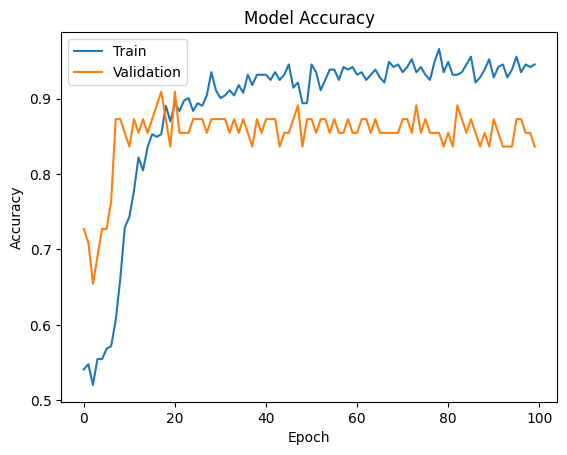

In [43]:

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

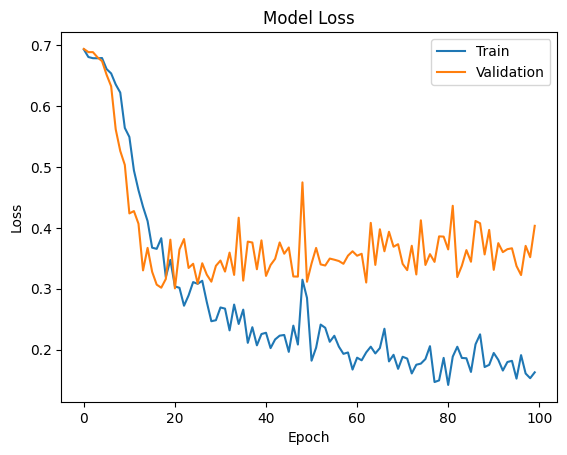

In [44]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 11ms/step - loss: 0.4287 - accuracy: 0.9107
Test loss: 0.42867788672447205
Test accuracy: 0.9107142686843872


2/2 [==============================] - 0s 9ms/step

Confusion Matrix


Text(50.722222222222214, 0.5, 'True')

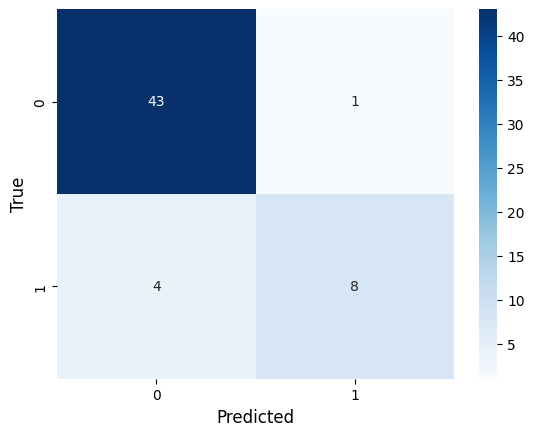

In [46]:
from sklearn.metrics import precision_recall_fscore_support
y_true = y_test
y_pred = model.predict(X_test)

# Make the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true.round(), y_pred.round())
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [47]:
print(classification_report(y_true.round(),y_pred.round()))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.89      0.67      0.76        12

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56



In [48]:
# print(model.trainable_variables) 
# !mkdir -p saved_model
# model.save('saved_model/rnn5')

In [49]:
# new_model = tf.keras.models.load_model('saved_model/rnn5')
# loss, acc = new_model.evaluate(X_test, y_test)
# print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))